# Imports

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

families = {0:"Lamberteschi", 1:"Peruzzi", 2:"Bischeri", 3:"Guadagni", 4:"Castellani",
            5:"Strozzi", 6:"Tornabuoni", 7:"Ridolfi", 8:"Albizzi", 9:"Ginori",
            10:"Barbadori", 11:"Medici", 12:"Acciaiuoli", 13:"Salviati", 14:"Pazzi"}

pos = {0:[6,6], 1:[2,5], 2:[3,5], 3:[5,5], 4:[1,4],
       5:[2,4], 6:[4,4], 7:[3,3], 8:[5,3], 9:[6,3],
       10:[2,2], 11:[4,2], 12:[3,1], 13:[5,1], 14:[6,1]}

# Graph generation

Number of nodes: 15


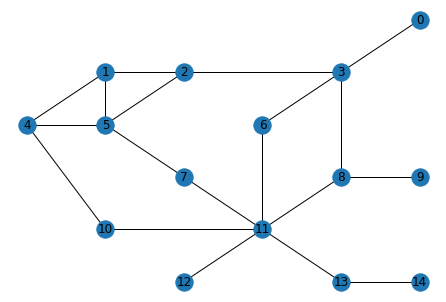

In [ ]:
G = nx.Graph()
G.add_nodes_from(families.keys())
G.add_edges_from([(0, 3),  # Lamberteschi
                  (1, 4), (1, 5), (1, 2),  # Peruzzi
                  (2, 1), (2, 5), (2, 3),  # Bischeri
                  (3, 0), (3, 2), (3, 6), (3, 8),  # Guadagni
                  (4, 1), (4, 5), (4, 10),  # Castellani
                  (5, 4), (5, 1), (5, 2), (5, 7),  # Strozzi
                  (6, 3), (6, 11),  # Tornabuoni
                  (7, 5), (7, 11),  # Ridolfi
                  (8, 3), (8, 11), (8, 9),  # Albizzi
                  (9, 8),  # Ginori
                  (10, 11), (10, 4),  # Barbadori
                  (11, 6), (11, 8), (11, 13), (11, 12), (11, 10), (11, 7),  # Medici
                  (12, 11),  # Acciaiuoli
                  (13, 11), (13, 14),  # Salviati
                  (14, 13)])  # Pazzi

n_nodes = len(G)
print("Number of nodes:", n_nodes)

nx.draw(G, pos, with_labels=True)

# PageRank

As we know, the Page Rank centrality is a special case of the Bonachich centrality where $\beta=0.15$ and $\mu = \mathbf{1}$


Bonachich centrality:
$ x = (1-\beta)P' x + \beta \mu $

We can then use the library provided pagerank algorithm (networkx.algorithms.link_analysis.pagerank_alg.pagerank) in order to check the results.

In [ ]:
W = nx.adjacency_matrix(G).toarray() # scipy.sparse.csr_matrix to numpy array
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

beta = 0.15
mu = 1

n_nodes = len(G)

x_0 = np.ones((n_nodes,1))/n_nodes  # initial condition: 1/n-uniform vector of size n_nodes
tol = 1e-5  # set a tolerance to assess convergence to the limit

x_old = x_0
while True:
    x_new = (1-beta) * P.T @ x_old + beta * mu
    if np.linalg.norm(x_new-x_old) < tol:
        break
    x_old=x_new
my_pagerank = x_new

my_pagerank = my_pagerank/np.sum(my_pagerank)  # Normalization

print("My Pagerank: \n")
for node in G.nodes:
  print(families[node], ": ", round(my_pagerank[node][0], 3))
print()

official_pagerank = nx.algorithms.link_analysis.pagerank_alg.pagerank(G)

print("Official Pagerank: \n")
for node in G.nodes:
  print(families[node], ": ", round(official_pagerank[node], 3))

My Pagerank: 

Lamberteschi :  0.032
Peruzzi :  0.07
Bischeri :  0.072
Guadagni :  0.104
Castellani :  0.072
Strozzi :  0.092
Tornabuoni :  0.054
Ridolfi :  0.051
Albizzi :  0.082
Ginori :  0.033
Barbadori :  0.052
Medici :  0.154
Acciaiuoli :  0.032
Salviati :  0.063
Pazzi :  0.037

Official Pagerank: 

Lamberteschi :  0.032
Peruzzi :  0.07
Bischeri :  0.072
Guadagni :  0.104
Castellani :  0.072
Strozzi :  0.092
Tornabuoni :  0.054
Ridolfi :  0.051
Albizzi :  0.082
Ginori :  0.033
Barbadori :  0.052
Medici :  0.154
Acciaiuoli :  0.032
Salviati :  0.063
Pazzi :  0.037
